Getting Reviews for competitor games on Steam

In [14]:
%pip install python-dotenv
%pip install requests pandas
%pip install matplotlib
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests
import pandas as pd

# Function to fetch game details (title)
def get_game_details(app_id):
    url = f"https://store.steampowered.com/api/appdetails?appids={app_id}"
    response = requests.get(url)
    data = response.json()
    
    # Extracting the title
    game_data = data[str(app_id)]['data']
    game_title = game_data['name']
    
    return game_title, game_data

# Function to fetch game reviews
def get_game_reviews(app_id, num_per_page=100):
    base_url = f"https://store.steampowered.com/appreviews/{app_id}?json=1"
    reviews = []
    cursor = '*'
    
    while True:
        url = f"{base_url}&num_per_page={num_per_page}&cursor={cursor}"
        response = requests.get(url)
        data = response.json()
        
        if 'reviews' not in data or not data['reviews']:
            break
        
        reviews.extend(data['reviews'])
        cursor = data['cursor']
        
        # If there are no more reviews to fetch, break the loop
        if len(data['reviews']) < num_per_page:
            break
    
    return pd.DataFrame(reviews)

def add_game_title(game_title,reviews_df):
    reviews_df.insert(0,"game_title",game_title)
    return reviews_df


# Example usage
app_id = 440  # For Team Fortress 2 (You can replace with any other game ID)
game_title, game_data = get_game_details(app_id)
reviews_df = get_game_reviews(app_id)

# Display game title and reviews
print(f"Game Title: {game_title}")
print("Game Reviews:")
print(reviews_df.head())  # Display the first few rows of reviews

print(add_game_title(game_title,reviews_df))
print(reviews_df.shape)


Game Title: Team Fortress 2
Game Reviews:
  recommendationid                                             author  \
0        176185586  {'steamid': '76561198136704161', 'num_games_ow...   
1        177061482  {'steamid': '76561197993804658', 'num_games_ow...   
2        176843421  {'steamid': '76561199531034267', 'num_games_ow...   
3        176697313  {'steamid': '76561198156430586', 'num_games_ow...   
4        176680602  {'steamid': '76561199526921664', 'num_games_ow...   

  language                                             review  \
0  english  Team Fortress 2 is one of my favorite games an...   
1  english  This is the game (mod at first) which has give...   
2  english  this game is wacky and funny if you like silly...   
3  english  am i terrible at this game? \r\nyes.\r\nis it ...   
4  english  played for 200+ hours, and let me tell ya, you...   

   timestamp_created  timestamp_updated  voted_up  votes_up  votes_funny  \
0         1727824367         1727824367      True   

In [9]:
import pandas as pd

SIE_games_appId = [2215430, 2322010, 1593500, 1817070, 1817190, 1888930, 2420110, 553850, 1895880,271590,1174180,2668510,397540,49520,261640]
all_reviews = []

for app_id in SIE_games_appId:
    game_title, game_data = get_game_details(app_id)
    reviews_df = get_game_reviews(app_id)
    add_game_title(game_title, reviews_df)
    all_reviews.append(reviews_df)
    # Display game title and reviews
    print(f"Game Title: {game_title}")
    print("Game Reviews:")
    print(reviews_df.head())  # Display the first few rows of reviews

# Combine all reviews into a single dataframe
combined_reviews_df = pd.concat(all_reviews, ignore_index=True)



Game Title: Ghost of Tsushima DIRECTOR'S CUT
Game Reviews:
                         game_title recommendationid  \
0  Ghost of Tsushima DIRECTOR'S CUT        175787958   
1  Ghost of Tsushima DIRECTOR'S CUT        175645072   
2  Ghost of Tsushima DIRECTOR'S CUT        177115839   
3  Ghost of Tsushima DIRECTOR'S CUT        177273501   
4  Ghost of Tsushima DIRECTOR'S CUT        177137451   

                                              author language  \
0  {'steamid': '76561198055768595', 'num_games_ow...  english   
1  {'steamid': '76561198088553743', 'num_games_ow...  english   
2  {'steamid': '76561198817589352', 'num_games_ow...  english   
3  {'steamid': '76561199560315104', 'num_games_ow...  english   
4  {'steamid': '76561198871878719', 'num_games_ow...  english   

                                              review  timestamp_created  \
0  If this game didn't make you cry at LEAST once...         1727323261   
1  The combat is challenging but not overwhelming...         17

In [12]:

print(combined_reviews_df.head())
combined_reviews_df.to_csv("Competitor Games Steam Reviews.csv")
combined_reviews_df.shape

                         game_title recommendationid  \
0  Ghost of Tsushima DIRECTOR'S CUT        175787958   
1  Ghost of Tsushima DIRECTOR'S CUT        175645072   
2  Ghost of Tsushima DIRECTOR'S CUT        177115839   
3  Ghost of Tsushima DIRECTOR'S CUT        177273501   
4  Ghost of Tsushima DIRECTOR'S CUT        177137451   

                                              author language  \
0  {'steamid': '76561198055768595', 'num_games_ow...  english   
1  {'steamid': '76561198088553743', 'num_games_ow...  english   
2  {'steamid': '76561198817589352', 'num_games_ow...  english   
3  {'steamid': '76561199560315104', 'num_games_ow...  english   
4  {'steamid': '76561198871878719', 'num_games_ow...  english   

                                              review  timestamp_created  \
0  If this game didn't make you cry at LEAST once...       1.727323e+09   
1  The combat is challenging but not overwhelming...       1.727132e+09   
2  Great game. Great graphics and impressive me

(6656, 18)

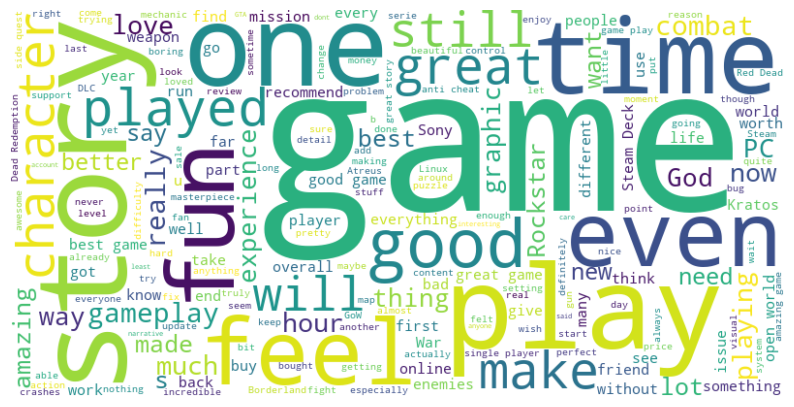

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all post titles and bodies for the word cloud
text = ' '.join(combined_reviews_df['review'])
# print(text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [19]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(combined_reviews_df['review'])

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Extract and plot topics
topics = lda.components_
words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: " + ' '.join([words[i] for i in topic.argsort()[-10:]]))


Topic 1: support just deck linux gta steam online play rockstar game
Topic 2: hard game long 10 average bugs bad grind just good
Topic 3: experience graphics games combat amazing best great world story game
Topic 4: great story played like god pc good play just game
Topic 5: play really good time just like story fun 10 game


In [7]:
T2_games_appId=[271590,1174180,2668510,397540,49520,261640]

for app_id in T2_games_appId:
    game_title, game_data = get_game_details(app_id)
    reviews_df = get_game_reviews(app_id)
    # Display game title and reviews
    print(f"Game Title: {game_title}")
    print("Game Reviews:")
    print(reviews_df.head())  # Display the first few rows of reviews

Game Title: Grand Theft Auto V
Game Reviews:
              author                                             review  \
0  76561199218287424  Spend 370 Hours grinding cash\r\nRockstar dete...   
1  76561198095069234  I like this game. I really do - it's one of th...   
2  76561198020701146  Great game, but thanks for screwing it on my s...   
3  76561198104032233  GTA V singleplayer\n100% fun\n\nGTA V online\n...   
4  76561199083523510  What the actual f..... My account earned a 30 ...   

   voted_up  votes_up  playtime_forever  
0      True        99             25121  
1      True        29             40642  
2      True        75             16647  
3      True        13             69963  
4     False        26              5346  
Game Title: Red Dead Redemption 2
Game Reviews:
              author                                             review  \
0  76561199479834823  ---{ Graphics }---\n☑ You forget what reality ...   
1  76561198267838774  This is the Ultimate Barbie Race